In [1]:
import stlearn as st
import os
import pandas as pd
from pathlib import Path
import scanpy as sc
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image 
from typing import Optional, Union
from anndata import AnnData
from scipy import ndimage as ndi
import seaborn as sns

/90days/s4596423/envs/stlearn/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
from anndata import AnnData

import stlearn
from pathlib import Path


from matplotlib import cm
import matplotlib as mpl

In [3]:
print(st.__version__)
print(pd.__version__)

0.2.5
1.0.5


In [103]:
def het_plot(
    adata: AnnData,
    het: str = 'het',
    use_het: str = 'louvain',
    dpi: int = 100,
    spot_size: Union[float,int] = 6.5,
    vmin: int = None,
    vmax: int = None,
    name: str = None,
    output: str = None,
):
    """ Plot tissue clusters and cluster heterogeneity using heatmap
    Parameters
    ----------
    adata: AnnData                  The data object to plot
    het: pd.DataFrame               Cluster heterogeneity count results from tl.cci.het
    use_cluster: str                The clustering results to use
    dpi: bool                       Dots per inch
    spot_size: Union[float,int]     Spot size
    
    Returns
    -------
    N/A
    """

    

    plt.rcParams['figure.dpi'] = dpi
    fig, ax = plt.subplots()
    num_clusters = len(set(adata.obs[use_het])) + 1
    ax.set_prop_cycle('color',plt.cm.rainbow(np.linspace(0,1,num_clusters)))
    for item in set(adata.obs[use_het]):
        ax.scatter(np.array(adata.obs[adata.obs[use_het]==item]['imagecol']), 
                   -np.array(adata.obs[adata.obs[use_het]==item]['imagerow']), 
                   alpha=0.6, s=spot_size, edgecolors='none')
    ax.legend(range(num_clusters))
    ax.grid(False)
    plt.axis('equal')

    if name is None:
        name = use_het
    if output is not None:
        fig.savefig(output + "/" + name + "_scatter.pdf", dpi=dpi, bbox_inches='tight', pad_inches=0)

    plt.rcParams['figure.dpi'] = dpi * 0.8
    plt.subplots()
#     sns.color_palette('viridis')
#     print(type(adata.uns['het']))
    g = sns.heatmap(adata.uns['merged'].transpose(), vmin=vmin, vmax=vmax)
#     g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)
#     plt.yticks(rotation=0) 
    plt.axis('equal')
    plt.gca().invert_yaxis()
    if output is not None:
        plt.savefig(output + "/" + name + "_heatmap.pdf", dpi=dpi, bbox_inches='tight', pad_inches=0)


In [104]:
path = '/QRISdata/Q1851/Minh/Spatial_transcriptomic/C1_refined/'
os.path.join(path, "filtered_feature_bc_matrix")

'/QRISdata/Q1851/Minh/Spatial_transcriptomic/C1_refined/filtered_feature_bc_matrix'

In [105]:

data = st.read.file_10x_mtx(os.path.join(path, "filtered_feature_bc_matrix"))
data.var_names_make_unique()
st.add.image(adata=data, imgpath=path + "spatial/tissue_hires_image.png", library_id='whatever')
st.add.positions(data,position_filepath =path +  "spatial/tissue_positions_list.csv",
                scale_filepath = path + "spatial/scalefactors_json.json",
                quality="high")

In [106]:
data.uns['spatial']['whatever']['scalefactors']={"spot_diameter_fullres": 16.905582973893615, 
                                                 "tissue_hires_scalef": 0.981836, 
                                                 "fiducial_diameter_fullres": 27.309018650135837, 
                                                 "tissue_lowres_scalef": 0.2945508}

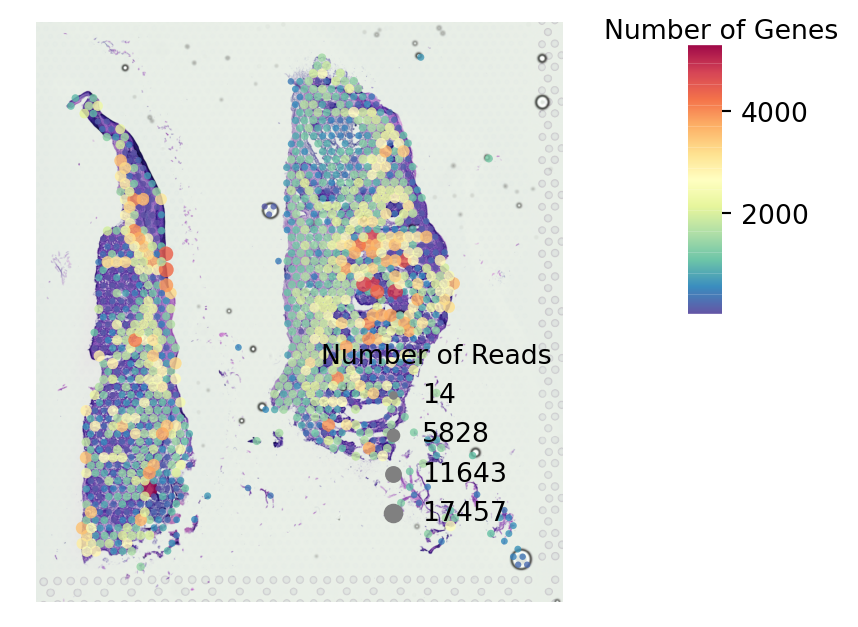

In [107]:
st.pl.QC_plot(data)

In [181]:
tissues = pd.read_csv('/QRISdata/Q1851/Minh/RNAScope/SkinSpatial/Tissue1_only.csv', sep=',', index_col = 0)
data.obs['tissue'] = tissues.Tissue1 # if your object is called "data"
data_subset = data[data.obs['tissue'] == 'Tissue1']

In [182]:
data_subset

View of AnnData object with n_obs × n_vars = 450 × 33538 
    obs: 'imagerow', 'imagecol', 'tissue'
    var: 'gene_ids', 'feature_types'
    uns: 'spatial'

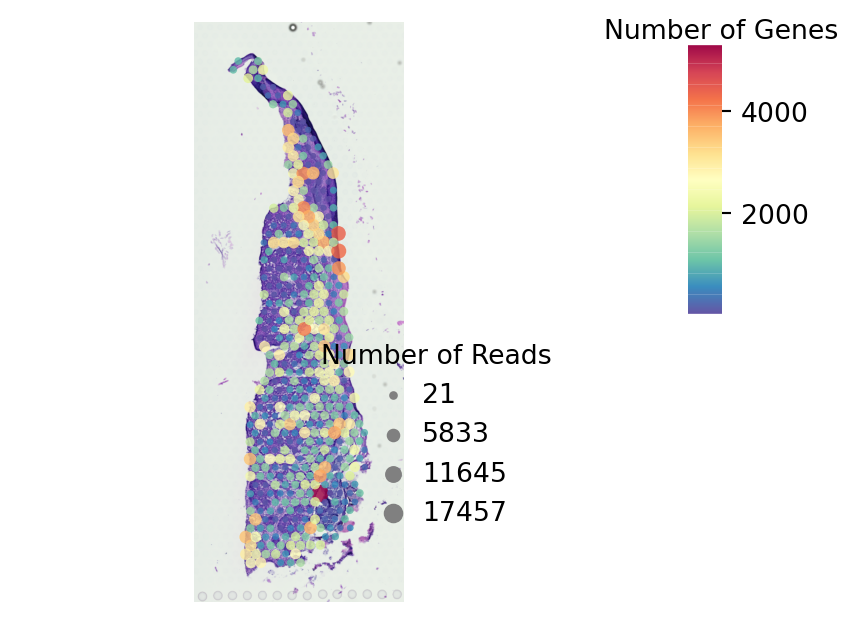

In [183]:
st.pl.QC_plot(data_subset)

### Preprocessing 

In [184]:
st.pp.filter_genes(data_subset,min_cells=3)

Trying to set attribute `.var` of view, copying.


In [247]:
data_subset.obs

,imagerow,imagecol,tissue,tile_path,louvain,lr_neighbours_louvain
AAACAGTGTTCCTGGG-1,1765.341128,712.812936,Tissue1,temp_tiling/712.812936-1765.341128-40.jpeg,0,10
AAACCGTTCGTCCAGG-1,1298.969028,697.103560,Tissue1,temp_tiling/697.10356-1298.969028-40.jpeg,0,8
AAATTGATAGTCCTTT-1,1366.715712,556.701012,Tissue1,temp_tiling/556.701012-1366.7157120000002-40.jpeg,0,12
AAATTTGCGGGTGTGG-1,1189.003396,581.246912,Tissue1,temp_tiling/581.2469120000001-1189.003396-40.jpeg,1,9
AACAACTGGTAGTTGC-1,765.832080,694.158052,Tissue1,temp_tiling/694.158052-765.83208-40.jpeg,1,8
...,...,...,...,...,...,...
TTGGTCACACTCGTAA-1,1209.621952,773.686768,Tissue1,temp_tiling/773.686768-1209.621952-40.jpeg,0,0
TTGTAAGGACCTAAGT-1,1166.421168,568.483044,Tissue1,temp_tiling/568.4830440000001-1166.421168-40.jpeg,1,8
TTGTTTCACATCCAGG-1,1432.498724,698.085396,Tissue1,temp_tiling/698.0853960000001-1432.498724-40.jpeg,0,0
TTGTTTCATTAGTCTA-1,1477.663180,544.918980,Tissue1,temp_tiling/544.91898-1477.66318-40.jpeg,0,0


In [251]:
print(np.array(data_subset.obs['imagerow']).min(),np.array(data_subset.obs['imagerow'].max()))

In [258]:
data_subset.obs['imagerow'].min()

522.336752

In [259]:
data_subset.obs['imagerow'].max()

1811.4874200000002

In [260]:
data_subset.obs['imagecol'].min()

488.95432800000003

In [261]:
data_subset.obs['imagecol'].max()

826.705912

In [263]:
(826.705912 - 488.95432800000003)/(1811.4874200000002 - 522.336752)*40

10.479817212490477

In [185]:
st.pp.normalize_total(data_subset)

In [186]:
data_subset.obsm['normalized'] = pd.DataFrame(data_subset.X.toarray(),
                                              index=data_subset.obs_names, 
                                              columns=data_subset.var_names)

In [187]:
st.pp.log1p(data_subset)

In [188]:
st.pp.scale(data_subset)

In [189]:
st.em.run_pca(data_subset,n_comps=50)

In [190]:
st.pp.tiling(data_subset,out_path="./temp_tiling",crop_size=40)
st.pp.extract_feature(data_subset)
st.spatial.morphology.adjust(data_subset,use_data='X_pca',radius=50,method="mean")
st.pp.neighbors(data_subset,n_neighbors=25,use_rep='X_pca_morphology') 

Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|██████████ [ time left: 00:00 ]
Adjusting data: 100%|██████████ [ time left: 00:00 ]


In [191]:
data_subset.obsm['normalized'] = pd.DataFrame(data_subset.X, 
                                              index=data_subset.obs_names, 
                                              columns=data_subset.var_names)

In [192]:
st.tl.clustering.louvain(data_subset, resolution=0.9)

In [264]:
st.tl.cci.het.count(data_subset, use_clustering='louvain', 
                    num_row=40, num_col=11)


AnnData object with n_obs × n_vars = 450 × 13353 
    obs: 'imagerow', 'imagecol', 'tissue', 'tile_path', 'louvain', 'lr_neighbours_louvain'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mean', 'std'
    uns: 'spatial', 'log1p', 'pca', 'neighbors', 'louvain', 'het', 'lr', 'lr_neighbours_louvain_max', 'tmp_color', 'merged', 'pvalue', 'permutation', 'merged_pvalues', 'merged_sign'
    obsm: 'filtered_counts', 'normalized', 'X_pca', 'X_tile_feature', 'X_morphology', 'X_pca_morphology', 'lr_neighbours'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

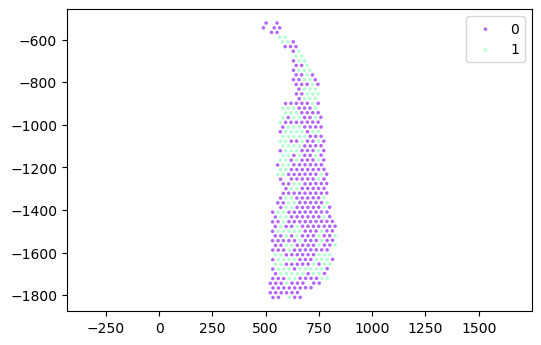

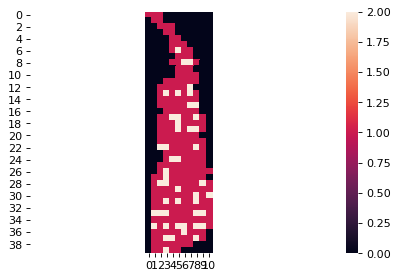

In [265]:
st.pl.het_plot(data_subset, use_cluster='louvain', use_het='het', 
               dpi=100, name='0804_het_louvain', output='.')

### Clustering based on Ligand-Receptor (L-R) co-expression
 

In [279]:
# data_subset.uns["lr"] = ['IL34_CSF1R']
data_subset.uns["lr"] = ['ITGAM_THY1']

#### cluster spatial spots based on the proportion of known ligand-receptor co-expression in the neighbouring spots

In [280]:
st.tl.cci.base.lr(adata=data_subset, res=1.02, use_data='normalized')

AnnData object with n_obs × n_vars = 450 × 13353 
    obs: 'imagerow', 'imagecol', 'tissue', 'tile_path', 'louvain', 'lr_neighbours_louvain'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mean', 'std'
    uns: 'spatial', 'log1p', 'pca', 'neighbors', 'louvain', 'het', 'lr', 'lr_neighbours_louvain_max', 'tmp_color', 'merged', 'pvalue', 'permutation', 'merged_pvalues', 'merged_sign'
    obsm: 'filtered_counts', 'normalized', 'X_pca', 'X_tile_feature', 'X_morphology', 'X_pca_morphology', 'lr_neighbours'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

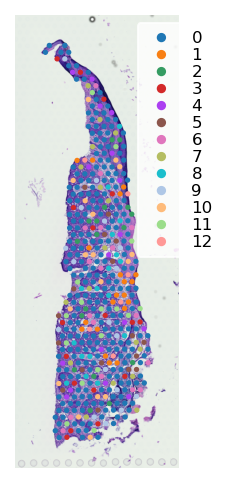

In [281]:
st.pl.cluster_plot(data_subset,
                   use_label="lr_neighbours_louvain", 
                   dpi=150)

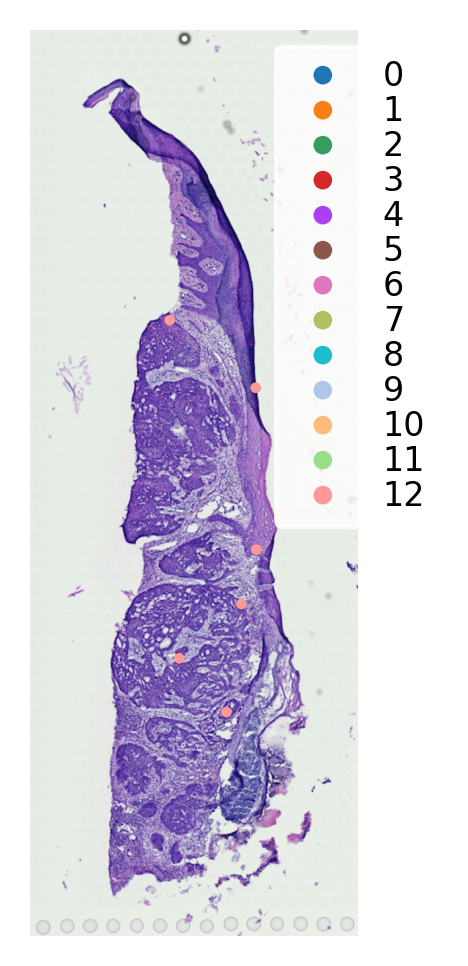

In [282]:
st.pl.cluster_plot(data_subset, use_label="lr_neighbours_louvain",
                   list_cluster=[data_subset.uns['lr_neighbours_louvain_max']], 
                   dpi=300, name='0804_lr_neighbours_louvain', output='.')

#### Merge results from cci clustering and cell type heterogeneity

In [283]:
# merge the number of spots belonging to largest lr cci cluster, with the number of different cell types within each window
st.tl.cci.merge(data_subset, use_lr='lr_neighbours_louvain_max', use_het='het')

AnnData object with n_obs × n_vars = 450 × 13353 
    obs: 'imagerow', 'imagecol', 'tissue', 'tile_path', 'louvain', 'lr_neighbours_louvain'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mean', 'std'
    uns: 'spatial', 'log1p', 'pca', 'neighbors', 'louvain', 'het', 'lr', 'lr_neighbours_louvain_max', 'tmp_color', 'merged', 'pvalue', 'permutation', 'merged_pvalues', 'merged_sign'
    obsm: 'filtered_counts', 'normalized', 'X_pca', 'X_tile_feature', 'X_morphology', 'X_pca_morphology', 'lr_neighbours'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

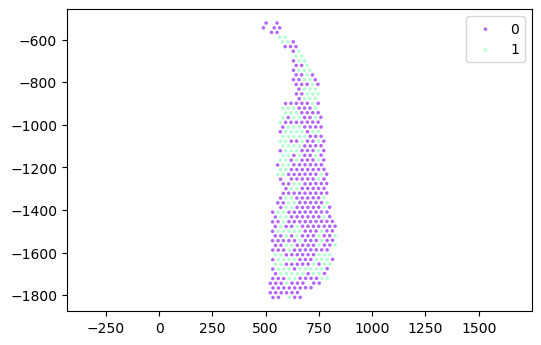

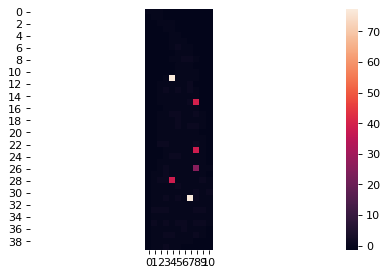

In [284]:
st.pl.het_plot(data_subset, use_cluster='louvain', use_het='merged', dpi=100, name='final_skin1', output='.')


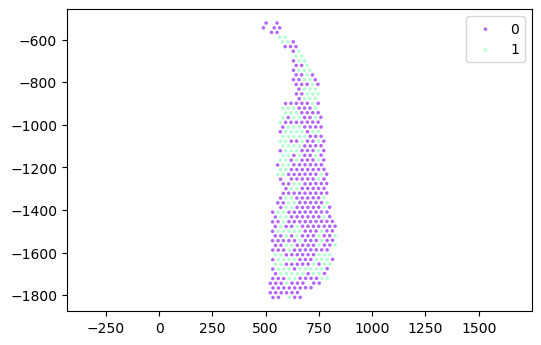

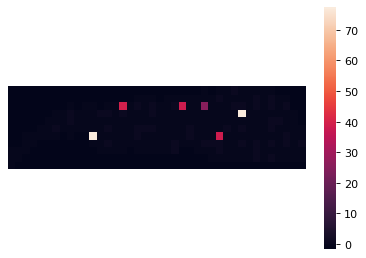

In [285]:
plt.ion()
het_plot(data_subset, use_het='louvain', 
         dpi=100, name='0804_final_skin1', output='.')
plt.axis('off')
plt.show()

In [286]:
array_heatmap = data_subset.uns['merged'].to_numpy()
flip_heatmap = np.flip(array_heatmap.transpose(), axis=1)

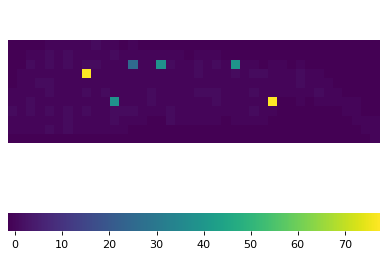

In [287]:
sns.heatmap(flip_heatmap, cmap='viridis', cbar_kws = dict(use_gridspec=False,location="bottom"))
plt.axis('equal')
plt.axis('off')
plt.gca().invert_yaxis()

# plt.savefig("0804_final_heatmap_skin1.pdf", dpi=200, bbox_inches='tight', pad_inches=0)

In [ ]:
st.tl.cci.permutation(data_subset, n_pairs=50)

In [ ]:
st.pl.het_plot(data_subset, use_cluster='louvain', use_het='merged_pvalues', dpi=100, name='permutation', output='.')


In [ ]:
array_heatmap = data_subset.uns['merged_pvalues'].to_numpy()
flip_heatmap2 = np.flip(array_heatmap.transpose(), axis=1)

In [ ]:
sns.heatmap(flip_heatmap2, cmap='viridis', cbar_kws = dict(use_gridspec=False,location="bottom"))
plt.axis('equal')
plt.axis('off')
plt.gca().invert_yaxis()
